In [126]:
import sklearn
import matplotlib
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from datetime import datetime

In [127]:
orderdata = pd.read_csv("C:/91APP_DataSet_2023/OrderData.csv")
OrderSlaveData = pd.read_csv("C:/91APP_DataSet_2023/OrderSlaveData.csv")
member= pd.read_csv("C:/91APP_DataSet_2023/MemberData_age_level_index(drop).csv") #匯入已含有年齡與會員類別標籤的資料
SalePageData = pd.read_csv("C:/91APP_DataSet_2023/SalePageData.csv")
SegmentData = pd.read_csv("C:/91APP_DataSet_2023/SegmentData.csv")

C:\Users\Sharon\AppData\Local\Temp\ipykernel_16496\4069781821.py:1: DtypeWarning: Columns (4,5,6) have mixed types. Specify dtype option on import or set low_memory=False.
  orderdata = pd.read_csv("C:/91APP_DataSet_2023/OrderData.csv")
C:\Users\Sharon\AppData\Local\Temp\ipykernel_16496\4069781821.py:2: DtypeWarning: Columns (6,7,8,10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  OrderSlaveData = pd.read_csv("C:/91APP_DataSet_2023/OrderSlaveData.csv")
C:\Users\Sharon\AppData\Local\Temp\ipykernel_16496\4069781821.py:3: DtypeWarning: Columns (11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  member= pd.read_csv("C:/91APP_DataSet_2023/MemberData_age_level_index(drop).csv") #匯入已含有年齡與會員類別標籤的資料


# 混合類別(年齡+會員等級)的總消費金額與平均消費金額

In [128]:
member=member.loc[member['MemberCardLevel']!=0]# 刪除會員等級為0

In [129]:
member

,ShopMemberId,RegisterSourceTypeDef,RegisterDateTime,Gender,Birthday,APPRefereeId,APPRefereeLocationId,IsAppInstalled,IsEnableEmail,IsEnablePushNotification,IsEnableShortMessage,FirstAppOpenDateTime,LastAppOpenDateTime,MemberCardLevel,CountryAliasCode,age,age_group,level_group,mix_index
0,HUDKwsme4lfsXH78PxhdsWp4FSonEjSJDliWqbmY5wQ=,LocationWizard,2019-11-09 17:27:42.783,Male,1970-01-01,NaN,NaN,True,True,True,True,2019-11-09 17:40:27.383,2023-03-29 16:58:40.490,20,TW,53,>=50,mid,>=50mid
1,i3+s315OzIdaCQ+Nb1Uzvp7HVS4dTtSfUsQY7U0wzvA=,LocationWizard,2020-10-04 16:06:10.080,Male,1970-01-01,aAUUnpRdvBgr74w8+zHLiA==,r/ngQhN6tZP3bXeSXj/e0A==,True,True,True,True,2020-10-06 20:23:21.690,2022-02-05 19:12:41.807,10,TW,53,>=50,low,>=50low
2,yDTBj6LrVHsUSCLZcMD23u628nb+ksFHmmMn1mAYq5Y=,LocationWizard,2020-08-16 18:47:28.817,Male,1970-01-01,ZRoLZiNWqVRRtWrC8vKmyQ==,TqfYonU/dikRdQ4pfXe+Vg==,True,True,True,True,2020-08-17 08:58:36.417,2022-07-29 11:30:53.870,10,TW,53,>=50,low,>=50low
3,2t8mHJt0pp0UCAkJ9RxTxxTuca7QMJ0GJ9gio7pmuYA=,AndroidApp,2019-12-05 08:46:48.063,Male,1970-01-01,NaN,NaN,True,True,True,True,2019-12-04 09:41:30.833,2020-05-14 07:55:01.620,10,TW,53,>=50,low,>=50low
4,acrCG5ZNR0f5y5ixoOx+07J6a47QXfUvmowKJJDas34=,Store,2013-12-21 00:00:00.000,Male,1970-01-01,NaN,NaN,True,True,True,True,2017-01-05 00:26:29.823,2018-12-28 20:54:25.117,10,TW,53,>=50,low,>=50low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
793783,8PjyFVNL33FhgfBAnilo4kWGAZ+8yvbGSQJfpIoyopY=,Store,2014-10-24 00:00:00.000,Female,1969-12-31,NaN,NaN,False,True,True,True,NaN,NaN,10,TW,54,>=50,low,>=50low
793784,zQWSJkxIUzuKVBX4tyfpmnWFG9GNGsctmAESsQCxbEE=,Store,2015-02-14 00:00:00.000,Male,1969-12-31,NaN,NaN,False,True,True,True,NaN,NaN,10,TW,54,>=50,low,>=50low
793785,2CiBt7qm62xx8f7KfmDzKxTsG/220AGt19zlJA98xvg=,Store,2014-11-30 00:00:00.000,Female,1969-12-31,NaN,NaN,False,True,True,True,NaN,NaN,10,TW,54,>=50,low,>=50low
793786,p893uYg2atTeFA2s4M4TKhuxdhNKyS7QeSBigopiNOY=,Store,2015-05-01 00:00:00.000,Female,1969-12-31,NaN,NaN,False,True,True,True,NaN,NaN,10,TW,54,>=50,low,>=50low


In [130]:
orderdata

,ShopMemberId,TradesGroupCode,OrderDateTime,ChannelType,ChannelDetail,PaymentType,ShippingType,TsCount,Qty,TotalSalesAmount,TotalPrice,TotalDiscount,TotalPromotionDiscount,TotalCouponDiscount,TotalLoyaltyPointDiscount,StatusDef
0,tBRjIPC81i5YKJBUntHQMG7bS9/hdi339zyw/Mf+7hs=,kaZBGrx3w3B+uyBd4u1KrBcHdu7fCFmVJTR/btskLj1J9g...,2017-10-25 15:38:07.263,LocationWizard,17305,NaN,NaN,1,1,3900.0,4900.0,-1000.0,0.0,-1000.0,0.0,Finish
1,krZV8ISz2OfnMsU4/uHG7/eD6DiSsH5Ux9/OnfSsEuw=,D5qVKX4BOcsMGpA/u2SNoi5qPJ/9v5QDOzKdAlyVNzzbdS...,2019-02-04 14:38:31.710,LocationWizard,17305,NaN,NaN,1,1,6900.0,6900.0,0.0,0.0,0.0,0.0,Finish
2,XEaqqY1eRKzWOnVlEcsb8Pmr4GlfoVeJnaGHZLspuHU=,zlckkBKwIHcy7ZmGadIlJ/b5ul6kGhiIAOTXf98aaAA=,2022-01-28 18:18:59.950,LocationWizard,17305,NaN,NaN,1,1,2900.0,6500.0,-3600.0,0.0,-3600.0,0.0,Finish
3,OpN1EQjO6VegY9B5zEFQcxpTmt9L5UtVFHLJFiUj3cM=,2/kJAOwUlTEPwQK1PdMdcwgpadrDU+gSM/cktuPmeCJAbw...,2020-10-04 16:25:04.750,LocationWizard,17305,NaN,NaN,1,1,1990.0,3900.0,-1910.0,0.0,-1910.0,0.0,Finish
4,8UznbMg+eOSRlkBLXLS84s2XcK4BWu3L4+aB46m58WI=,swn3xlscpuSy2stEWoLhKOH+rqgdFw3y50b/PMWrEL0=,2022-09-04 17:31:27.590,LocationWizard,17305,NaN,NaN,1,1,5900.0,5900.0,0.0,0.0,0.0,0.0,Finish
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2498902,vCE13BuuHkzLNjENG03hqRMHSNtC+PlUXoOMwNJDIes=,B6abuFW5X+62HNpQsb/R9mJ60zGT4AYWZaZZLmPo/0kooC...,2018-01-21 17:34:10.000,Pos,004598,NaN,NaN,6,6,18520.0,36815.0,-18295.0,-17320.0,-975.0,0.0,Finish
2498903,sWXNi5mjW7RRTCGeUKLt66DBI5xn7H0z9C5McGW3cs4=,aBT768gl7946Uhw2egYdiV5Sw7C/ASrTH36eZWJw5ZidL0...,2017-10-28 21:47:29.000,Pos,004508,NaN,NaN,12,12,18635.0,35930.0,-17295.0,-14006.0,-3289.0,0.0,Finish
2498904,kZkAYAWKIike3X5uLKQi7MjHgd7WTTzoLtKAyYdWp3Y=,TZ9VwanlRQD6K/pvT/p4y053f2I1mHLvsdGnOeDtkI2Kfm...,2020-12-13 19:55:37.000,Pos,004616,NaN,NaN,9,9,14941.0,32300.0,-17359.0,-6007.0,-11352.0,0.0,Finish
2498905,4kE3tw+9oBGoFvxkaXOox7Yghn5G0JewPV5SEANOCgk=,wAqZMWjXO6+hMGlY1EsfcMPPJGpi7yA8MXrUdAL7pDFvHS...,2018-02-11 19:29:59.000,Pos,009532,NaN,NaN,13,13,23075.0,49690.0,-26615.0,-26615.0,0.0,0.0,Finish


In [131]:
#篩選主訂單為2022年並成交的訂單
orderdata=orderdata.loc[orderdata["OrderDateTime"].between("2022-01-01 00:00:00", "2022-12-31 23:59:59")] 
orderdata=orderdata.loc[orderdata["StatusDef"]=="Finish"]

In [132]:
order_group=orderdata.groupby('ShopMemberId', as_index=False)['TotalSalesAmount'].sum() 

In [133]:
member_order_group=pd.merge(member,order_group) #將會員資料與主單資料合併
member_order_group

,ShopMemberId,RegisterSourceTypeDef,RegisterDateTime,Gender,Birthday,APPRefereeId,APPRefereeLocationId,IsAppInstalled,IsEnableEmail,IsEnablePushNotification,IsEnableShortMessage,FirstAppOpenDateTime,LastAppOpenDateTime,MemberCardLevel,CountryAliasCode,age,age_group,level_group,mix_index,TotalSalesAmount
0,HUDKwsme4lfsXH78PxhdsWp4FSonEjSJDliWqbmY5wQ=,LocationWizard,2019-11-09 17:27:42.783,Male,1970-01-01,NaN,NaN,True,True,True,True,2019-11-09 17:40:27.383,2023-03-29 16:58:40.490,20,TW,53,>=50,mid,>=50mid,3450.0
1,tjSCb2E0bmYsiu3tqSVarY91fiG228+IS8aFHQjT1wk=,LocationWizard,2021-10-03 11:29:23.097,Female,1970-01-01,SqvLJGDFx3BN6Hp9sqQTkA==,r/ngQhN6tZP3bXeSXj/e0A==,True,True,True,True,2021-10-03 12:12:52.887,2022-06-05 19:22:58.480,20,TW,53,>=50,mid,>=50mid,10354.0
2,0nO3UBitFvrPLi08Xi7TjuCLoM0kSBKLGhShRiI5548=,LocationWizard,2022-07-11 14:08:11.423,Female,1970-01-01,NaN,NaN,True,True,True,True,2022-07-11 14:09:31.840,2022-07-11 17:25:15.937,20,TW,53,>=50,mid,>=50mid,5625.0
3,cgkFRAeGQKrT8UDoRs2q6W7s12EeC02RZakNWi56vL8=,LocationWizard,2022-08-24 20:57:37.133,Female,1970-09-14,NaN,NaN,True,True,True,True,2022-08-24 21:38:32.030,2022-08-24 21:39:10.053,20,TW,53,>=50,mid,>=50mid,7438.0
4,P9xFqGylMMR7t8xLJORpmDHnsrv47ZUXQz61tt7HzSk=,LocationWizard,2021-07-31 19:33:30.520,Female,1970-09-14,NaN,NaN,True,True,True,True,2022-03-27 15:33:23.667,2022-04-07 22:28:10.473,10,TW,53,>=50,low,>=50low,2690.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112676,j3/GdMDySx8XjyIfb5YziDW0G+SIsmy9EzZACllnbfM=,LocationWizard,2022-05-09 15:03:10.673,Female,2000-02-20,NaN,NaN,False,True,True,True,NaN,NaN,20,TW,23,20-30,mid,20-30mid,12986.0
112677,EjveqEnfhqyllT9gRYJ3XProQvCFQNXulzpsFyYJtac=,Store,2013-06-26 00:00:00.000,Female,1962-12-28,NaN,NaN,False,True,True,True,NaN,NaN,30,TW,61,>=50,hig,>=50hig,28549.0
112678,GBTKvXGuLfKdXnAq+yDCL8ZEgkKZYJ3ui/5B2ulxLA8=,Store,2016-08-18 00:00:00.000,Male,1967-03-13,NaN,NaN,False,True,True,True,NaN,NaN,10,TW,56,>=50,low,>=50low,3696.0
112679,dVxyb0mbNW+i0aytEJR+abxwq+kyrVvaBpvfIC1QRgc=,Web,2022-10-30 23:11:14.810,Male,1967-11-24,NaN,NaN,False,True,True,True,NaN,NaN,10,TW,56,>=50,low,>=50low,4447.0


In [134]:
mixcount=member_order_group['mix_index'].value_counts() #計算不同混合類別的總人數

In [135]:
mixcount=mixcount.reset_index()   

In [136]:
mixcount.columns = ['mix_index', 'counts']

In [137]:
mixcount

,mix_index,counts
0,30-40low,19220
1,40-50low,14738
2,30-40mid,12610
3,20-30low,10678
4,40-50mid,9257
5,>=50low,8753
6,20-30mid,7958
7,30-40hig,7777
8,>=50mid,6030
9,40-50hig,5969


In [138]:
mix_total=member_order_group.groupby("mix_index")['TotalSalesAmount'].sum() #計算不同混合類別的總消費金額

In [139]:
mix_total=mix_total.reset_index()
mix_total

,mix_index,TotalSalesAmount
0,20-30hig,86468051.0
1,20-30low,40610811.0
2,20-30mid,63908554.0
3,30-40hig,152120912.0
4,30-40low,71115824.0
5,30-40mid,100646169.0
6,40-50hig,120549129.0
7,40-50low,54229797.0
8,40-50mid,73607196.0
9,<=20hig,2975245.0


In [140]:
mix_mg=pd.merge(mixcount,mix_total)# 將混合類別的總消費金額與總人數資料合併

In [141]:
mix_mg

,mix_index,counts,TotalSalesAmount
0,30-40low,19220,71115824.0
1,40-50low,14738,54229797.0
2,30-40mid,12610,100646169.0
3,20-30low,10678,40610811.0
4,40-50mid,9257,73607196.0
5,>=50low,8753,32035978.0
6,20-30mid,7958,63908554.0
7,30-40hig,7777,152120912.0
8,>=50mid,6030,48941946.0
9,40-50hig,5969,120549129.0


In [142]:
mix_mg['average']=mix_mg['TotalSalesAmount']/mix_mg['counts'] #計算不同混合類別的平均消費金額

In [143]:
mix_mg
#mix_mg.to_csv("C:/91APP_DataSet_2023/mix_v2.csv") 

,mix_index,counts,TotalSalesAmount,average
0,30-40low,19220,71115824.0,3700.094901
1,40-50low,14738,54229797.0,3679.589972
2,30-40mid,12610,100646169.0,7981.456701
3,20-30low,10678,40610811.0,3803.222607
4,40-50mid,9257,73607196.0,7951.517338
5,>=50low,8753,32035978.0,3659.999772
6,20-30mid,7958,63908554.0,8030.730586
7,30-40hig,7777,152120912.0,19560.359007
8,>=50mid,6030,48941946.0,8116.408955
9,40-50hig,5969,120549129.0,20195.866812


In [144]:
mix_mg.sort_values('average',ascending=False,inplace=True)

Text(0, 0.5, 'average spending')

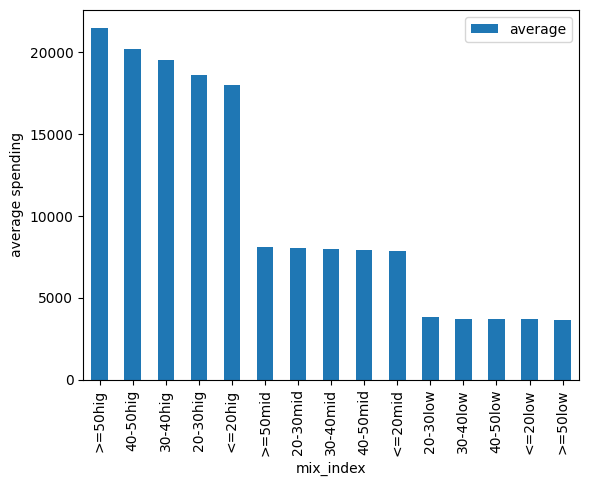

In [145]:
#不同混合類別的平均消費金額圖
mix_mg.sort_values('average',ascending=False,inplace=True)
mix_mg.plot.bar(x = 'mix_index', y = 'average')

plt.xlabel('mix_index')
plt.ylabel('average spending')

Text(0, 0.5, 'total spending')

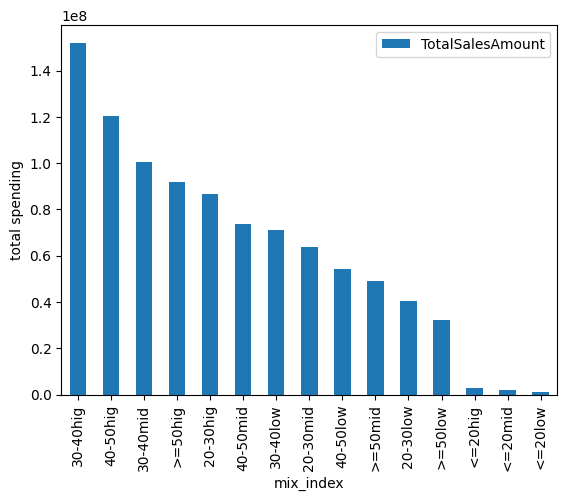

In [146]:
#不同混合類別的總消費金額圖
mix_mg.sort_values('TotalSalesAmount',ascending=False,inplace=True)
mix_mg.plot.bar(x = 'mix_index', y = 'TotalSalesAmount')
plt.xlabel('mix_index')
plt.ylabel('total spending')

# 廣告來源分析，依照不同年齡與會員等級分群

In [147]:
behav_1 = pd.read_csv("C:/91APP_DataSet_2023/BehaviorData/BehaviorData_2022-01-01.csv")
behav_2 = pd.read_csv("C:/91APP_DataSet_2023/BehaviorData/BehaviorData_2022-02-01.csv")
behav_3 = pd.read_csv("C:/91APP_DataSet_2023/BehaviorData/BehaviorData_2022-03-01.csv")
behav_4 = pd.read_csv("C:/91APP_DataSet_2023/BehaviorData/BehaviorData_2022-04-01.csv")
behav_5 = pd.read_csv("C:/91APP_DataSet_2023/BehaviorData/BehaviorData_2022-05-01.csv")
behav_6 = pd.read_csv("C:/91APP_DataSet_2023/BehaviorData/BehaviorData_2022-06-01.csv")
behav_7 = pd.read_csv("C:/91APP_DataSet_2023/BehaviorData/BehaviorData_2022-07-01.csv")
behav_8 = pd.read_csv("C:/91APP_DataSet_2023/BehaviorData/BehaviorData_2022-08-01.csv")
behav_9 = pd.read_csv("C:/91APP_DataSet_2023/BehaviorData/BehaviorData_2022-09-01.csv")
behav_10 = pd.read_csv("C:/91APP_DataSet_2023/BehaviorData/BehaviorData_2022-10-01.csv")
behav_11= pd.read_csv("C:/91APP_DataSet_2023/BehaviorData/BehaviorData_2022-11-01.csv")
behav_12= pd.read_csv("C:/91APP_DataSet_2023/BehaviorData/BehaviorData_2022-12-01.csv")

C:\Users\Sharon\AppData\Local\Temp\ipykernel_16496\2321349845.py:1: DtypeWarning: Columns (13,15,19,20,21,22,23,24,25) have mixed types. Specify dtype option on import or set low_memory=False.
  behav_1 = pd.read_csv("C:/91APP_DataSet_2023/BehaviorData/BehaviorData_2022-01-01.csv")
C:\Users\Sharon\AppData\Local\Temp\ipykernel_16496\2321349845.py:2: DtypeWarning: Columns (13,15,19,20,21,22,23,24,25) have mixed types. Specify dtype option on import or set low_memory=False.
  behav_2 = pd.read_csv("C:/91APP_DataSet_2023/BehaviorData/BehaviorData_2022-02-01.csv")
C:\Users\Sharon\AppData\Local\Temp\ipykernel_16496\2321349845.py:3: DtypeWarning: Columns (13,14,15,19,20,21,22,23,24,25) have mixed types. Specify dtype option on import or set low_memory=False.
  behav_3 = pd.read_csv("C:/91APP_DataSet_2023/BehaviorData/BehaviorData_2022-03-01.csv")
C:\Users\Sharon\AppData\Local\Temp\ipykernel_16496\2321349845.py:4: DtypeWarning: Columns (13,14,15,19,20,21,22,23,24,25) have mixed types. Specify 

In [148]:
list(behav_1.columns)

['Tunnel',
 'Device',
 'ShopMemberId',
 'FullvisitorId',
 'DeviceId',
 'HitTime',
 'Language',
 'CountryAliasCode',
 'Version',
 'UTMSource',
 'UTMMedium',
 'UTMName',
 'Behavior',
 'RegisterTunnel',
 'CategoryId',
 'SalePageId',
 'UnitPrice',
 'Qty',
 'TotalSalesAmount',
 'CurrencyCode',
 'TradesGroupCode',
 'SearchTerm',
 'ContentType',
 'ContentName',
 'ContentId',
 'PageType',
 'EventTime']

In [149]:
#member= pd.read_csv("C:/91APP_DataSet_2023/MemberData_age_level_index(drop).csv")
#member=member.loc[member['MemberCardLevel']!=0] # 刪除會員等級為0  

In [150]:
#orderdata=orderdata.loc[orderdata["OrderDateTime"].between("2022-01-01 00:00:00", "2022-12-31 23:59:59")]
#orderdata=orderdata.loc[orderdata["StatusDef"]=="Finish"] ，orderdata中的2022年完成的訂單
orderdata

,ShopMemberId,TradesGroupCode,OrderDateTime,ChannelType,ChannelDetail,PaymentType,ShippingType,TsCount,Qty,TotalSalesAmount,TotalPrice,TotalDiscount,TotalPromotionDiscount,TotalCouponDiscount,TotalLoyaltyPointDiscount,StatusDef
2,XEaqqY1eRKzWOnVlEcsb8Pmr4GlfoVeJnaGHZLspuHU=,zlckkBKwIHcy7ZmGadIlJ/b5ul6kGhiIAOTXf98aaAA=,2022-01-28 18:18:59.950,LocationWizard,17305,NaN,NaN,1,1,2900.0,6500.0,-3600.0,0.0,-3600.0,0.0,Finish
4,8UznbMg+eOSRlkBLXLS84s2XcK4BWu3L4+aB46m58WI=,swn3xlscpuSy2stEWoLhKOH+rqgdFw3y50b/PMWrEL0=,2022-09-04 17:31:27.590,LocationWizard,17305,NaN,NaN,1,1,5900.0,5900.0,0.0,0.0,0.0,0.0,Finish
10,Ve6c+CYySXvh05W32X/vTFY9U0o9V/wwwFBOxKV/1U0=,8j7AEg4ZW2cCjpCwd5Pa1LcLOkYO98FXxwn9RJv4WKc=,2022-02-06 22:04:59.380,LocationWizard,17305,NaN,NaN,1,1,2990.0,5500.0,-2510.0,0.0,-2510.0,0.0,Finish
30,Cl8xkthmsayjNnyDLopM4JnK4ISxfa1K3gn3wac/rY0=,w0wN+bdBM9IvefpeJLOiLaV2k+6bSVlxm2WvWBnXYaE=,2022-12-10 11:40:19.083,LocationWizard,17305,NaN,NaN,1,1,5900.0,5900.0,0.0,0.0,0.0,0.0,Finish
56,vX+OSdVJCaD1xtjyfC+8u9swic3cORXRzskQs+ADEPQ=,CIzcpSy2d3rUKyoCsIQeqLz5xu46OKbwW4cMBx2iz2k=,2022-12-28 21:09:49.357,LocationWizard,17305,NaN,NaN,1,1,5800.0,7500.0,-1700.0,0.0,-1700.0,0.0,Finish
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2498852,V8NGNlY6nVAOG4S4mK9IpmWzW/cbl/ajIpPAKSIlso4=,KDOAPWrzUVkulbKwkgPiC+np0nB+qxVp9QJkotQFR9vvTq...,2022-02-12 14:54:48.000,Pos,004626,NaN,NaN,6,6,12453.0,22630.0,-10177.0,-3947.0,-6230.0,0.0,Finish
2498859,e4qsTZOmkg5n3841d4ACxfkCPMTAFU45lYJyXb0ldvE=,I1jlMhcQ0SMP5Uo7OvZGXqyqKsu6izZStvbqeJdReW9lP3...,2022-09-18 18:57:03.000,Pos,004626,NaN,NaN,3,3,7249.0,15900.0,-8651.0,-3086.0,-5565.0,0.0,Finish
2498867,94/8v1CgdPyxN/qTnJrgZycUl5EtZ3HegRLbikXQErA=,7sRxKcgi/f6IA4/hkSjyqHenNGEHvF03E4pKRnZk4eM=,2022-12-24 12:45:35.017,LocationWizard,17305,NaN,NaN,4,4,10325.0,19500.0,-9175.0,0.0,-9175.0,0.0,Finish
2498869,rG19JG1e/KzcBgYmQKZLuKipNtCeGYS5nKro89NvEVk=,map5m8KAv47XaAg01s1XhFGzHfO9DkSvFSmlkAIYTAermu...,2022-11-23 12:40:46.000,Pos,004506,NaN,NaN,5,5,10877.0,24150.0,-13273.0,-12700.0,-573.0,0.0,Finish


In [151]:
test2=pd.merge(orderdata,member)# 將member與orderdata合併

In [152]:
col=list(test2.columns) #列出它的column names
col

['ShopMemberId',
 'TradesGroupCode',
 'OrderDateTime',
 'ChannelType',
 'ChannelDetail',
 'PaymentType',
 'ShippingType',
 'TsCount',
 'Qty',
 'TotalSalesAmount',
 'TotalPrice',
 'TotalDiscount',
 'TotalPromotionDiscount',
 'TotalCouponDiscount',
 'TotalLoyaltyPointDiscount',
 'StatusDef',
 'RegisterSourceTypeDef',
 'RegisterDateTime',
 'Gender',
 'Birthday',
 'APPRefereeId',
 'APPRefereeLocationId',
 'IsAppInstalled',
 'IsEnableEmail',
 'IsEnablePushNotification',
 'IsEnableShortMessage',
 'FirstAppOpenDateTime',
 'LastAppOpenDateTime',
 'MemberCardLevel',
 'CountryAliasCode',
 'age',
 'age_group',
 'level_group',
 'mix_index']

In [153]:
test2=test2[['ShopMemberId',
 'TradesGroupCode',
 'OrderDateTime',
 'ChannelType',
 'TotalSalesAmount',
 'TotalPrice',
 'TotalDiscount',
 'StatusDef',
 'Gender',
 'age',
 'age_group',
 'level_group',
 'mix_index']] #篩選出想要的column name

In [154]:
#將每一月份的behavior與篩選後的主單與行為資料合併
b1_mg2=pd.merge(behav_1,test2) 
b2_mg2=pd.merge(behav_2,test2)
b3_mg2=pd.merge(behav_3,test2)
b4_mg2=pd.merge(behav_4,test2)
b5_mg2=pd.merge(behav_5,test2)
b6_mg2=pd.merge(behav_6,test2)
b7_mg2=pd.merge(behav_7,test2)
b8_mg2=pd.merge(behav_8,test2)
b9_mg2=pd.merge(behav_9,test2)
b10_mg2=pd.merge(behav_10,test2)
b11_mg2=pd.merge(behav_11,test2)
b12_mg2=pd.merge(behav_12,test2)

In [155]:
#全部篩選後的月份檔案合併
df2 = pd.DataFrame()
files = [b1_mg2, b2_mg2,b3_mg2,b4_mg2,b5_mg2,b6_mg2,b7_mg2,b8_mg2,b9_mg2,b10_mg2,b11_mg2,b12_mg2]
for file in files:
    df2 = pd.concat([df2, file], axis=0)

In [156]:
df2['age_group'].unique()

array(['30-40', '>=50', '40-50', '20-30', '<=20'], dtype=object)

In [157]:
#刪除重複的行為資料
df2_drop=df2.drop_duplicates(subset=['ShopMemberId', "HitTime","UTMSource"], keep='first', inplace=False, ignore_index=False)

In [158]:
df2

,Tunnel,Device,ShopMemberId,FullvisitorId,DeviceId,HitTime,Language,CountryAliasCode,Version,UTMSource,...,OrderDateTime,ChannelType,TotalPrice,TotalDiscount,StatusDef,Gender,age,age_group,level_group,mix_index
0,Web,Desktop,+C0i/tayEm33zlbHkelqi6N+DnzrqKBy2CPNoIml+DU=,IBvjPFPekUf6Ab0kF0es5UQW3gkVy5MRgo2t9sTXMr9l4w...,NaN,1642315482938,zh-tw,TW,NaN,affiliate,...,2022-01-16 14:58:33.583,OfficialECom,1950.0,-500.0,Finish,Female,34,30-40,mid,30-40mid
1,Web,Desktop,+C0i/tayEm33zlbHkelqi6N+DnzrqKBy2CPNoIml+DU=,IBvjPFPekUf6Ab0kF0es5UQW3gkVy5MRgo2t9sTXMr9l4w...,NaN,1642315482938,zh-tw,TW,NaN,affiliate,...,2022-01-16 14:58:33.583,OfficialECom,1950.0,-500.0,Finish,Female,34,30-40,mid,30-40mid
2,App,iOS APP,IURx6n9ninzrVn0qIXI3Ccy8cgvlE2tFD+btvVcor1Q=,0nRSbbX0WD0kRHNvqtEydCEtJOJ+O+axlnc57671NFEzaB...,jVyPjadESoQ6v5KxCzatlOge52afNNTU+aw7KGMA2Yjqc+...,1642851313741,zh-Hant-TW,TW,2.62.0,(direct),...,2022-01-22 19:55:19.760,OfficialECom,1560.0,0.0,Finish,Female,62,>=50,mid,>=50mid
3,App,iOS APP,gIzZ18gOEWBy8gRZcVpPG5FNdk72UBUHedTIsG8yXsE=,tQFuvvteGRI56zwISRnO/qvyBDTeGJewaKqBg37uHcZgos...,jVyPjadESoQ6v5KxCzatlOge52afNNTU+aw7KGMA2Yjqc+...,1642651394073,zh-Hant-TW,TW,2.66.0,(direct),...,2022-01-20 12:09:57.640,OfficialECom,2180.0,-200.0,Finish,Male,58,>=50,mid,>=50mid
4,App,iOS APP,gIzZ18gOEWBy8gRZcVpPG5FNdk72UBUHedTIsG8yXsE=,tQFuvvteGRI56zwISRnO/qvyBDTeGJewaKqBg37uHcZgos...,jVyPjadESoQ6v5KxCzatlOge52afNNTU+aw7KGMA2Yjqc+...,1642651394073,zh-Hant-TW,TW,2.66.0,(direct),...,2022-01-20 12:09:57.640,OfficialECom,2180.0,-200.0,Finish,Male,58,>=50,mid,>=50mid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9036,Web,MobileWeb,p8RFew2ovUAe7kOnMWaCGVtrZfy4obKnNUOllvtPODY=,Q/6xV/BzN4Esvvk9h53Pdrb6fn8Rjjq0uIMnemeJewnsJn...,NaN,1671263399378,zh-TW,TW,NaN,(direct),...,2022-12-17 15:56:53.887,OfficialECom,1950.0,0.0,Finish,Female,46,40-50,low,40-50low
9037,Web,MobileWeb,SjvU5xkBHnYUpe5TQiYROiOk4pJvVGacA5nwYn2j5wM=,mLD5mY/p+dIiN0CtaZky3nWk1sTHLEqkAfp+5309WoBs8Z...,NaN,1671677959105,zh-TW,TW,NaN,(direct),...,2022-12-22 11:03:56.697,OfficialECom,4830.0,-800.0,Finish,Female,35,30-40,low,30-40low
9038,Web,MobileWeb,9+WY5QYxS3/QqURfUopRW+9TzpzFBmI87Lc9rum3Y6U=,Kc8ojHpd7j1aV0LOoWk6YCUH5OukyHJ1oM0gFG8fQNJhnK...,NaN,1670851455903,zh-TW,TW,NaN,affiliate,...,2022-12-12 21:45:26.227,OfficialECom,1212.0,0.0,Finish,Male,42,40-50,mid,40-50mid
9039,Web,MobileWeb,3iJRl2bl31ysuH6XBV8KVNzu3VIdx9o6/BrqzrzjChQ=,wwkxe9IVyT6ooEUw53fl0mSnP8l4BDceIQ9+B/QQuLlZ6I...,NaN,1671358244836,zh-TW,TW,NaN,google,...,2022-12-18 18:19:36.177,OfficialECom,3590.0,-300.0,Finish,Female,44,40-50,low,40-50low


In [159]:
df2_drop

,Tunnel,Device,ShopMemberId,FullvisitorId,DeviceId,HitTime,Language,CountryAliasCode,Version,UTMSource,...,OrderDateTime,ChannelType,TotalPrice,TotalDiscount,StatusDef,Gender,age,age_group,level_group,mix_index
0,Web,Desktop,+C0i/tayEm33zlbHkelqi6N+DnzrqKBy2CPNoIml+DU=,IBvjPFPekUf6Ab0kF0es5UQW3gkVy5MRgo2t9sTXMr9l4w...,NaN,1642315482938,zh-tw,TW,NaN,affiliate,...,2022-01-16 14:58:33.583,OfficialECom,1950.0,-500.0,Finish,Female,34,30-40,mid,30-40mid
2,App,iOS APP,IURx6n9ninzrVn0qIXI3Ccy8cgvlE2tFD+btvVcor1Q=,0nRSbbX0WD0kRHNvqtEydCEtJOJ+O+axlnc57671NFEzaB...,jVyPjadESoQ6v5KxCzatlOge52afNNTU+aw7KGMA2Yjqc+...,1642851313741,zh-Hant-TW,TW,2.62.0,(direct),...,2022-01-22 19:55:19.760,OfficialECom,1560.0,0.0,Finish,Female,62,>=50,mid,>=50mid
3,App,iOS APP,gIzZ18gOEWBy8gRZcVpPG5FNdk72UBUHedTIsG8yXsE=,tQFuvvteGRI56zwISRnO/qvyBDTeGJewaKqBg37uHcZgos...,jVyPjadESoQ6v5KxCzatlOge52afNNTU+aw7KGMA2Yjqc+...,1642651394073,zh-Hant-TW,TW,2.66.0,(direct),...,2022-01-20 12:09:57.640,OfficialECom,2180.0,-200.0,Finish,Male,58,>=50,mid,>=50mid
5,App,Android APP,Q93qi31e3hrx5l5B7W/mjhHhJYoU8tpJeKv0PK1iicU=,Esp2yvX5ksvUn1kbWAueDrK/Mh9W44r4Iht5/KDkQPoEXq...,6XsJHVIweroyk1h9dFUJvbIk3XZKq0JuHJjOLqAgats/5D...,1643252067629,zh-TW,TW,2.66.5,(direct),...,2022-01-27 10:55:04.567,OfficialECom,350.0,0.0,Finish,Male,46,40-50,low,40-50low
6,App,Android APP,i78iqpHJZ8JgXBLMqEc6c/jHVbqWqOzCYNba8HpWkqc=,EevcCkh2vobwnhQRTJWhMarYBMVTL/PlZj5kW9ueNNSjhV...,aOIwDQIIRWsKRqyHDQBDygyFMErq9BLR5+5TLxgTxnqW/b...,1643169804893,zh-TW,TW,2.66.5,Audience,...,2022-01-26 12:05:47.987,OfficialECom,1150.0,-500.0,Finish,Female,37,30-40,hig,30-40hig
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9036,Web,MobileWeb,p8RFew2ovUAe7kOnMWaCGVtrZfy4obKnNUOllvtPODY=,Q/6xV/BzN4Esvvk9h53Pdrb6fn8Rjjq0uIMnemeJewnsJn...,NaN,1671263399378,zh-TW,TW,NaN,(direct),...,2022-12-17 15:56:53.887,OfficialECom,1950.0,0.0,Finish,Female,46,40-50,low,40-50low
9037,Web,MobileWeb,SjvU5xkBHnYUpe5TQiYROiOk4pJvVGacA5nwYn2j5wM=,mLD5mY/p+dIiN0CtaZky3nWk1sTHLEqkAfp+5309WoBs8Z...,NaN,1671677959105,zh-TW,TW,NaN,(direct),...,2022-12-22 11:03:56.697,OfficialECom,4830.0,-800.0,Finish,Female,35,30-40,low,30-40low
9038,Web,MobileWeb,9+WY5QYxS3/QqURfUopRW+9TzpzFBmI87Lc9rum3Y6U=,Kc8ojHpd7j1aV0LOoWk6YCUH5OukyHJ1oM0gFG8fQNJhnK...,NaN,1670851455903,zh-TW,TW,NaN,affiliate,...,2022-12-12 21:45:26.227,OfficialECom,1212.0,0.0,Finish,Male,42,40-50,mid,40-50mid
9039,Web,MobileWeb,3iJRl2bl31ysuH6XBV8KVNzu3VIdx9o6/BrqzrzjChQ=,wwkxe9IVyT6ooEUw53fl0mSnP8l4BDceIQ9+B/QQuLlZ6I...,NaN,1671358244836,zh-TW,TW,NaN,google,...,2022-12-18 18:19:36.177,OfficialECom,3590.0,-300.0,Finish,Female,44,40-50,low,40-50low


## 廣告來源分析-年齡

In [160]:
df2_drop_age=df2_drop.groupby('UTMSource')['age_group'].value_counts() #計算在不同廣告來源中,不同年齡的加總次數

In [161]:
adsource_drop=df2_drop_age.to_frame() #轉換成dataframe

In [162]:
adsource_drop

age_group
UTMSource          age_group           
(direct)           30-40          11592
                   40-50          10212
                   >=50            7714
                   20-30           5192
                   <=20              96
...                                 ...
www.bing.com       20-30              2
www.ecosia.org     20-30              1
www.facebook.com   20-30              1
www.google.co.jp   30-40              1
www.timberland.com 30-40              2

[203 rows x 1 columns]

In [163]:
#adsource_drop.to_csv('C:/91APP_DataSet_2023/adsource_new_drop.csv') #儲存成csv檔

## 廣告來源分析-會員等級

In [164]:
df2_drop_member=df2_drop.groupby('UTMSource')['level_group'].value_counts()

In [165]:
adsource_drop_member=df2_drop_member.to_frame() #轉換成dataframe

In [166]:
adsource_drop_member

level_group
UTMSource                                          level_group             
(direct)                                           low                14163
                                                   hig                11808
                                                   mid                 8835
9bcc9d76e3af0eab4a15452f571c7bc7.safeframe.goog... hig                    1
APPPUSH                                            hig                    6
...                                                                     ...
www.ecosia.org                                     mid                    1
www.facebook.com                                   mid                    1
www.google.co.jp                                   mid                    1
www.timberland.com                                 low                    1
                                                   mid                    1

[145 rows x 1 columns]

In [167]:
#adsource_drop_member.to_csv('C:/91APP_DataSet_2023/adsource_new_member_drop.csv') #儲存成csv檔